# Music Classification using Neural Networks
by: Team 22
***
This notebook will serve as the 'main' training & classification point of network. It will be kept as easy-to-read as possible by importing necessary pre-processing, data loaders, and other helper functions that do not need to be tuned with the network.

In [5]:
# import libraries
import torch
import matplotlib.pyplot as plt

# files and networks made by us
from DataProcessing import SplitTVT as tvt
from Networks import CRNN as nets
from Networks import Helpers as hp

In [6]:
pathSets = ["Data/trainSet.pkl", "Data/valSet.pkl", "Data/testSet.pkl"]  # path to datasets
#pathSets = ["Data/PKLaug/PKLaug/trainSet.pkl", "Data/PKLaug/PKLaug/valSet.pkl", "Data/PKLaug/PKLaug/testSet.pkl"]  # path to datasets

In [10]:
# hyperparameters
bs = 128  # batch size
lr = 0.0003  # learning rate
epo = 50  # epochs

# hyperparameters for rnn
hidden_size = 70
num_layers = 1

trainLoader, valLoader, testLoader = tvt.load_data(pathSets[0], pathSets[1], pathSets[2], bs)



In [ ]:

net = nets.CRNN3("crnn_old", hiddenSize=hidden_size, numLayers=num_layers)

In [4]:
hp.train(net, trainLoader, valLoader, lr, bs, epo, save=True)

Training Started...
Epoch 1: Train acc: 0.5686507936507936, Train loss: 1.3939281702041626 | Validation acc: 0.6203703703703703, Validation loss: 1.3591081857681275
Epoch 2: Train acc: 0.6575396825396825, Train loss: 1.1849415600299835 | Validation acc: 0.6944444444444444, Validation loss: 1.1713181257247924
Epoch 3: Train acc: 0.7408730158730159, Train loss: 1.0073796421289445 | Validation acc: 0.7462962962962963, Validation loss: 1.005047607421875
Epoch 4: Train acc: 0.7896825396825397, Train loss: 0.8626785755157471 | Validation acc: 0.7722222222222223, Validation loss: 0.8794421434402466
Epoch 5: Train acc: 0.8277777777777777, Train loss: 0.74478839635849 | Validation acc: 0.7962962962962963, Validation loss: 0.7875290870666504
Epoch 6: Train acc: 0.8523809523809524, Train loss: 0.645942223072052 | Validation acc: 0.8055555555555556, Validation loss: 0.685176420211792
Epoch 7: Train acc: 0.8658730158730159, Train loss: 0.5678504914045334 | Validation acc: 0.8148148148148148, Valida

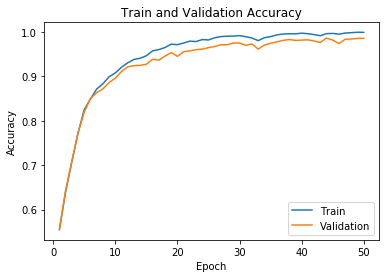

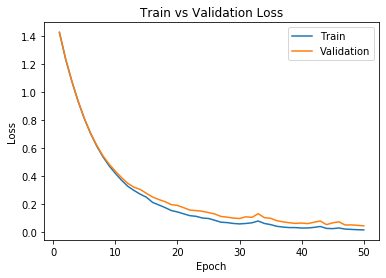

In [5]:
name = hp.get_model_name(net.name, bs, lr, epo)
hp.plot_training_curve(name)

In [13]:
hp.get_accuracy(net, testLoader, torch.nn.CrossEntropyLoss(), bs)

NameError: name 'net' is not defined

In [14]:
tmodel = torch.load("model_crnn_old_bs128_lr0.0003_epoch34")
tnet = nets.CRNN3("crnn_t", hiddenSize=hidden_size, numLayers=num_layers)
tnet.load_state_dict(tmodel)

<All keys matched successfully>

In [15]:
hp.get_accuracy(tnet, testLoader, torch.nn.CrossEntropyLoss(), bs)

(0.9425925925925925, 0.18187064975500106)

In [16]:
from torchsummary import summary
summary(tnet, input_size=(20, 213))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 25, 18, 212]             175
         MaxPool2d-2           [-1, 25, 9, 106]               0
            Conv2d-3           [-1, 50, 6, 104]          15,050
         MaxPool2d-4            [-1, 50, 3, 52]               0
            Conv2d-5           [-1, 100, 1, 50]          45,100
       BatchNorm2d-6           [-1, 100, 1, 50]             200
               GRU-7  [[-1, 50, 70], [-1, 2, 70]]               0
            Linear-8                    [-1, 6]             426
Total params: 60,951
Trainable params: 60,951
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 2.45
Params size (MB): 0.23
Estimated Total Size (MB): 2.70
----------------------------------------------------------------


In [21]:
from sklearn.metrics import confusion_matrix

nb_classes = 9

# Initialize the prediction and label lists(tensors)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')

with torch.no_grad():
    for i, (classes, inputs) in enumerate(testLoader):
        outputs = tnet(inputs.float())
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist, classes.view(-1).cpu()])

In [ ]:
# Confusion matrix
conf_mat=confusion_matrix(lbllist.numpy(), predlist.numpy())
print(conf_mat)

# Per-class accuracy
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
print(class_accuracy)